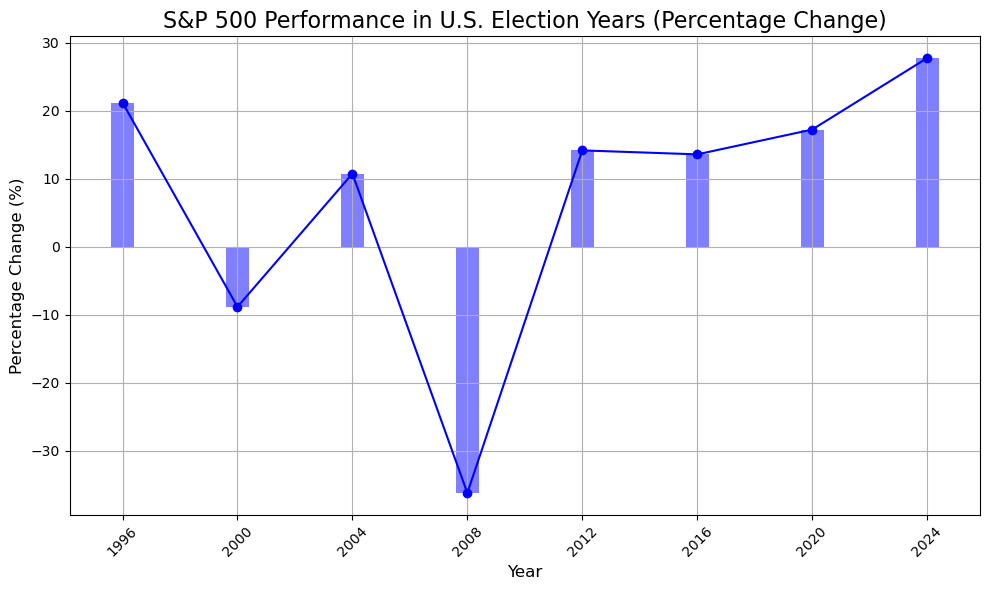

In [7]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the election years of interest
election_years = [1996, 2000, 2004, 2008, 2012, 2016, 2020, 2024]

# Download historical data for S&P 500 (SPY ETF as a proxy for the index)
# The data is fetched from Yahoo Finance
spy = yf.Ticker("SPY")
data = spy.history(start="1990-01-01", end="2025-01-01")

# Filter the data for the first trading day of January and last trading day of December
performance_data = []

for year in election_years:
    # Get the data for the first and last trading days of the election year
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"
    
    # Find the first trading day of the year (January)
    start_date = data.loc[data.index.year == year].iloc[0].name  # first trading day of the year
    # Find the last trading day of the year (December)
    end_date = data.loc[data.index.year == year].iloc[-1].name  # last trading day of the year
    
    try:
        start_price = data.loc[start_date, 'Close']
        end_price = data.loc[end_date, 'Close']
        
        # Calculate percentage change for the year
        percentage_change = ((end_price - start_price) / start_price) * 100
        performance_data.append((year, percentage_change))
    except KeyError:
        # In case the data for that specific date is missing, continue to next year
        print(f"Data missing for {year}")
        continue

# Create a DataFrame for plotting
performance_df = pd.DataFrame(performance_data, columns=['Year', 'Performance'])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(performance_df['Year'], performance_df['Performance'], marker='o', linestyle='-', color='b', label='S&P 500 Performance')
plt.bar(performance_df['Year'], performance_df['Performance'], alpha=0.5, color='b')
plt.title('S&P 500 Performance in U.S. Election Years (Percentage Change)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Percentage Change (%)', fontsize=12)

# Correct usage of xticks with the 'performance_df['Year']' as positions
plt.xticks(list(performance_df['Year']), rotation=45)  # Rotate for better visibility if needed
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
#Key Sector Performance in Election Years

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Stock: AAPL | Year: 1996
First few rows:
 Ticker                         AAPL
Date                               
1990-01-02 00:00:00+00:00  0.332589
1990-01-03 00:00:00+00:00  0.334821
1990-01-04 00:00:00+00:00  0.335938
1990-01-05 00:00:00+00:00  0.337054
1990-01-08 00:00:00+00:00  0.339286
Last few rows:
 Ticker                           AAPL
Date                                 
2024-11-04 00:00:00+00:00  222.009995
2024-11-05 00:00:00+00:00  223.449997
2024-11-06 00:00:00+00:00  222.720001
2024-11-07 00:00:00+00:00  227.479996
2024-11-08 00:00:00+00:00  226.960007
Stock: MSFT | Year: 1996
First few rows:
 Ticker                         MSFT
Date                               
1990-01-02 00:00:00+00:00  0.616319
1990-01-03 00:00:00+00:00  0.619792
1990-01-04 00:00:00+00:00  0.638021
1990-01-05 00:00:00+00:00  0.622396
1990-01-08 00:00:00+00:00  0.631944
Last few rows:
 Ticker                           MSFT
Date                                 
2024-11-04 00:00:00+00:00  408.459991


<Figure size 1200x800 with 0 Axes>

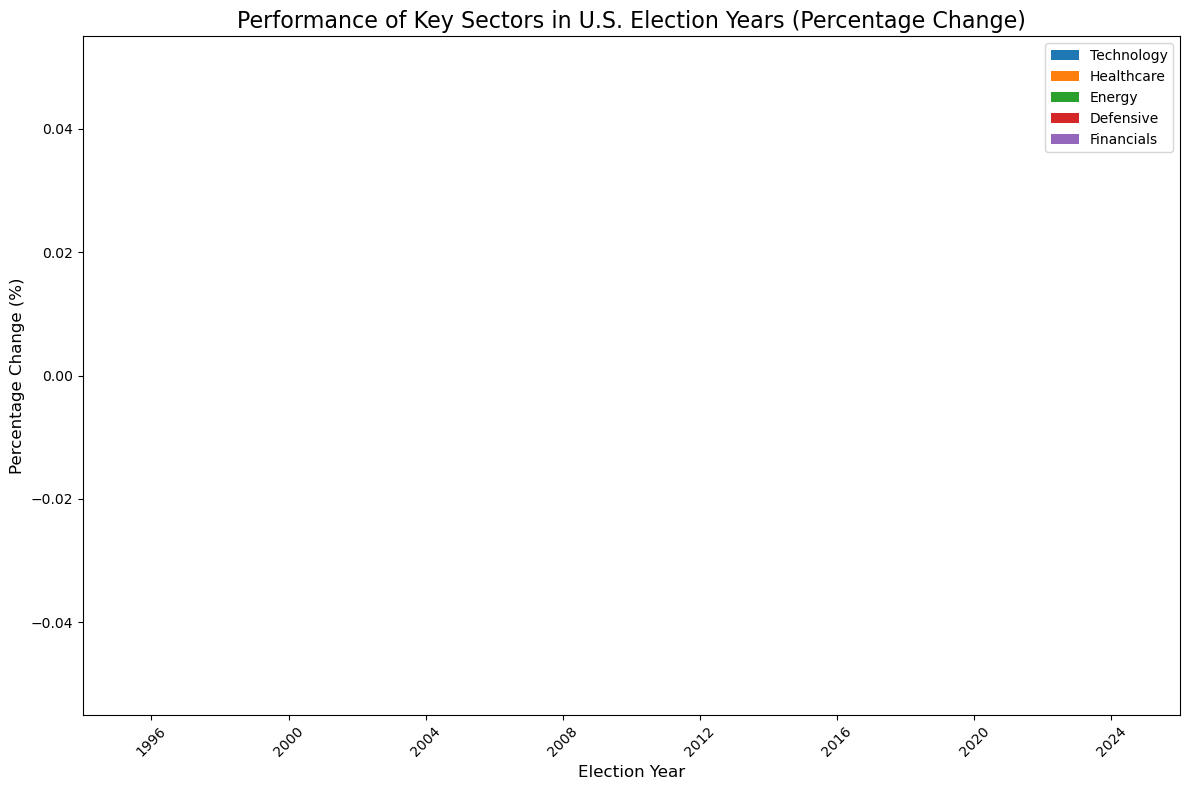

In [39]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Define the stock tickers for each sector
sector_stocks = {
    'Technology': ['AAPL', 'MSFT'],
    'Healthcare': ['PFE', 'JNJ'],
    'Energy': ['XOM', 'CVX'],
    'Defensive': ['PG', 'KO'],
    'Financials': ['JPM', 'BAC']
}

# Download historical data for each sector stock
data = {}
for sector, stocks in sector_stocks.items():
    sector_data = {}
    for stock in stocks:
        stock_data = yf.download(stock, start="1990-01-01", end="2025-01-01")['Close']
        sector_data[stock] = stock_data
    data[sector] = sector_data

# Define the election years
election_years = [1996, 2000, 2004, 2008, 2012, 2016, 2020, 2024]

# Function to calculate percentage change
def calculate_performance(stock_data, year):
    try:
        # Print the first and last few rows of stock data to debug
        print(f"Stock: {stock_data.name} | Year: {year}")
        print("First few rows:\n", stock_data.head())
        print("Last few rows:\n", stock_data.tail())

        # Filter data for the specific year
        year_data = stock_data.loc[stock_data.index.year == year]
        
        # Check if data exists for the specified year
        if year_data.empty:
            print(f"No data for {stock_data.name} in {year}")
            return None
        
        # Calculate start and end prices for the year
        start_price = year_data.iloc[0]  # First available trading day of the year
        end_price = year_data.iloc[-1]  # Last available trading day of the year
        
        # Calculate percentage change
        return ((end_price - start_price) / start_price) * 100
    except Exception as e:
        print(f"Error calculating performance for {stock_data.name} in {year}: {e}")
        return None  # In case of any error, return None

# Store the performance data for each sector
performance_data = {sector: [] for sector in sector_stocks}

# Calculate performance for each year and sector
for year in election_years:
    for sector, stocks in sector_stocks.items():
        sector_performance = 0
        valid_stock_count = 0
        for stock in stocks:
            stock_data = data[sector][stock]
            stock_data.name = stock  # Adding stock name for debugging
            stock_performance = calculate_performance(stock_data, year)
            if stock_performance is not None:
                sector_performance += stock_performance
                valid_stock_count += 1
        if valid_stock_count > 0:
            sector_performance /= valid_stock_count
        else:
            sector_performance = None  # If no valid stock data, set to None
        performance_data[sector].append(sector_performance)

# Create a DataFrame for plotting
performance_df = pd.DataFrame(performance_data, index=election_years)

# Ensure all values are numeric and handle errors
performance_df = performance_df.apply(pd.to_numeric, errors='coerce')

# Fill NaN values with 0 (optional, could also use forward-fill or interpolation)
performance_df = performance_df.fillna(0)

# Check the resulting DataFrame
print("\nPerformance DataFrame:\n", performance_df)

# Check if we have valid data to plot
if performance_df.isnull().values.any():
    print("Warning: There are NaN values in the DataFrame. This might be due to missing stock data for specific years.")
else:
    print("Data looks good to plot!")

# Plotting the grouped bar chart
plt.figure(figsize=(12, 8))

# Check if there is valid data to plot
if performance_df.empty or performance_df.isnull().all(axis=1).all():
    print("No valid data to plot. Please check the data fetching or performance calculation.")
else:
    # Create a grouped bar chart (not stacked)
    performance_df.plot(kind='bar', stacked=False, figsize=(12, 8))

    # Set chart title and labels
    plt.title('Performance of Key Sectors in U.S. Election Years (Percentage Change)', fontsize=16)
    plt.xlabel('Election Year', fontsize=12)
    plt.ylabel('Percentage Change (%)', fontsize=12)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    # Display the chart
    plt.tight_layout()
    plt.show()
